# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
x_test = pd.read_csv("x_test.csv", delimiter=",")
y_test = pd.read_csv("y_test.csv", delimiter=",")
x_train = pd.read_csv("x_train_balanced.csv", delimiter=",")
y_train = pd.read_csv("y_train_balanced.csv", delimiter=",")

In [10]:
# Antes de tudo sempre é importante verificar se dentro das bases X e Y está tudo alinhado e correto.
x_test

,Age,Income,Number of Children,Gender_encoded,Education_encoder,Marital_Status_encoder,Home_Ownership_encoder
0,36.0,6750000,2,0,1,0,0
1,34.0,4750000,0,1,0,1,1
2,32.0,8500000,0,1,4,1,1
3,49.0,7750000,1,0,2,0,0
4,50.0,16250000,0,1,4,0,0
5,30.0,10500000,2,1,4,0,0
6,36.0,13000000,0,1,3,0,0
7,29.0,2750000,0,0,3,1,1
8,41.0,12000000,0,1,2,1,0
9,36.0,14000000,0,1,1,0,0


In [9]:
y_test

,Credit Score_encoder
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,2
8,1
9,1


In [5]:
x_train

,Age,Income,Number of Children,Gender_encoded,Education_encoder,Marital_Status_encoder,Home_Ownership_encoder
0,44.000000,7500000,0,1,4,1,0
1,31.000000,6500000,0,1,1,1,1
2,36.000000,9000000,1,0,2,0,0
3,25.000000,6250000,0,0,1,1,1
4,36.000000,9000000,2,0,4,0,0
...,...,...,...,...,...,...,...
238,31.807942,2850283,0,0,1,1,1
239,27.305215,3597392,0,0,2,1,1
240,35.163275,2940233,0,0,0,1,1
241,32.619186,3750000,0,0,3,1,1


In [6]:
y_train

,Credit Score_encoder
0,1
1,0
2,1
3,0
4,1
...,...
238,2
239,2
240,2
241,2


In [12]:
contagem_classes = y_train.value_counts()

print("Contagem das classes:")
print(contagem_classes)

Contagem das classes:
Credit Score_encoder
0                       81
1                       81
2                       81
Name: count, dtype: int64


In [13]:
contagem_classes = y_test.value_counts()

print("Contagem das classes:")
print(contagem_classes)

Contagem das classes:
Credit Score_encoder
1                       27
0                        9
2                        4
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

In [ ]:
# Primeiros vamos implementar o nosso algoritimo da árvore de decisão a base de treino.
# logo depois o ideal é verificar os parâmetros da nossa árvore.
# logo depois aplicamos nosso modelo a base de teste e avaliamos os resultados.
# Depois o ideal seria analisar os resultados e entender quais features são as mais importantes para o modelo.
# Isso pode ajudar a interpretar como o modelo está tomando suas decisões.
# Caso vejamos muitas categorias mais em destaques do que as outras, ultilizamos a tecnica PODA (técnica utilizada para reduzir o tamanho de uma árvore de decisão, removendo ramos que têm pouca importância, a fim de melhorar a generalização do modelo.)

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [48]:
arvore_score = DecisionTreeClassifier (criterion = "gini", random_state = 0)

arvore_score.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
# Trazendo a acurácia 
previssoes = arvore_score.predict(x_train)
acuracia = accuracy_score(y_train, previssoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [ ]:
# Vemos uma acurácia de 100% na base de treinamento, porém temos muito que analisar ainda, acredito que isso não seja algo pelo qual já devemos tomar decisões

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [21]:
arvore_teste = DecisionTreeClassifier (criterion = "gini", random_state = 0)
arvore_teste.fit(x_test, y_test)

DecisionTreeClassifier(random_state=0)

In [22]:
previsoes = arvore_teste.predict(x_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [23]:
relatorio_previsoes = classification_report(y_test, previsoes)
print("Relatorio de classificação:")
print(relatorio_previsoes)

Relatorio de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



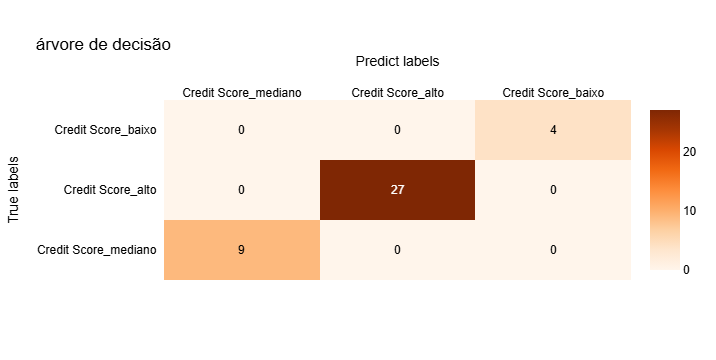

In [40]:
conf_matrix = confusion_matrix(y_test, previsoes)
class_names = ["Credit Score_mediano", "Credit Score_alto", "Credit Score_baixo"]

fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale="oranges",
    showscale=True
)
fig.update_layout(
    title="árvore de decisão",
    xaxis_title="Predict labels",
    yaxis_title="True labels",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)    

In [ ]:
# Bom, aqui na base de teste aparece f1-score, recall e precisão de 100%, acredito que pelo fato da árvore de decisão se basear em mais dados complexos,
# ela acaba sendo mais eficaz, e claro... os meus dados são dados de treinamento mesmo, para eu colocar em pratica as minhas habilidades, por conta disso acaba que são poucos dados para a árvore de decisão.
# E por conta disso, acredito que a árvore teve uma precisão muito boa sobre essas poucas quantidades de dados.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

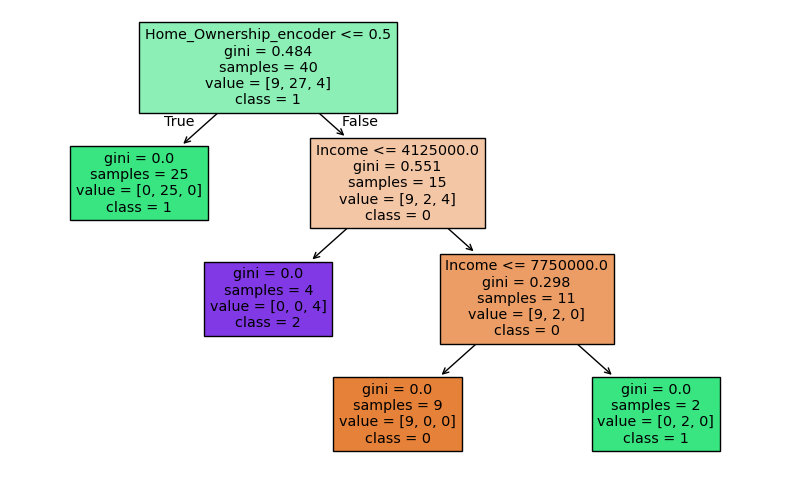

In [44]:
plt.figure(figsize=(10, 6))
plot_tree(arvore_teste, filled=True, feature_names=x_train.columns, class_names=["0", "1", '2'])
plt.show()

In [45]:
print(arvore_teste.get_depth())

3


In [ ]:
# Vemos que a profundidade da nossa Árvore no gráfico é de nivel 3.
# Ela também se basea nas categorias home_ownership e Income, usando o home_ownership como o nó e o Income duas vezes.

# home_ownership = propriedade da casa 
# Income = Renda/Salario

# 6) Identifique as 2 principais features do modelo.


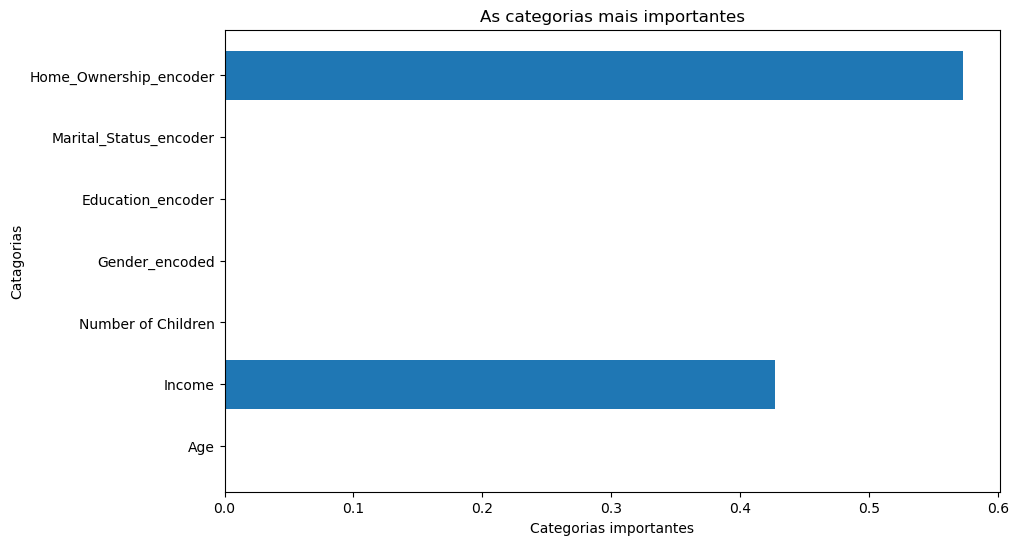

In [47]:
features_importantes = arvore_teste.feature_importances_

nomes_features = x_train.columns
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, features_importantes)
plt.xlabel("Categorias importantes")
plt.ylabel("Catagorias")
plt.title("As categorias mais importantes")
plt.show()

In [50]:
# Já confirmado mais acima, vemos que as categorias/features principais são:
# home_ownership = propriedade da casa 
# Income = Renda/Salario

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [52]:
x_train_2 = x_train[["Home_Ownership_encoder", "Income"]]
x_test_2 = x_test[["Home_Ownership_encoder", "Income"]]

arvore_score_2 = DecisionTreeClassifier (criterion="gini", random_state = 0)
arvore_score_2.fit(x_train_2, y_train)

DecisionTreeClassifier(random_state=0)

In [53]:
precisoes = arvore_score_2.predict(x_test_2)

In [56]:
relatorio = classification_report(y_test, precisoes)
print("Relatorio de classificação:")
print(relatorio)

Relatorio de classificação:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.93      1.00      0.96        27
           2       1.00      1.00      1.00         4

    accuracy                           0.95        40
   macro avg       0.98      0.93      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
# O desempenho da árvore com todas as features esta se saindo melhor com uma precisão de 100% em todas as áreas.
# Já a precisão da árvore que só tem apenas duas features, tem uma precisão de 100% para score_médio, 93% para score alto e 100% para score baixo

# São poucos dados, então acaba que eles são bem parecidos, porém a árvore com todas as features principais é a melhor.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [ ]:
# Esses aqui foram os resultados com o Naive Bayes
# precision    recall  f1-score   support

#           0       0.80      0.89      0.84         9
#           1       0.96      0.93      0.94        27
#           2       1.00      1.00      1.00         4

#    accuracy                            0.93        40
#   macro avg       0.92      0.94       0.93        40
# weighted avg       0.93      0.93      0.93        40


# Esses aqui com Árvore de decisão
# Relatorio de classificação:

#            precision    recall  f1-score   support

#         0       1.00      1.00      1.00         9
#         1       1.00      1.00      1.00        27
#         2       1.00      1.00      1.00         4

#   accuracy                             1.00        40
#  macro avg         1.00      1.00      1.00        40
# weighted avg       1.00      1.00      1.00        40

# Como eu falei, foram poucos dados, mas já da para ter uma base, acredito que a Árvore de decisão seja bem melhor, por conta de lidar com dados mais complexos.